# 导入第三方库

In [1]:
import pandas as pd
import numpy as np
import os
# Imports Cell
from __future__ import print_function
#导入模型
from tensorflow.keras.models import Model
#导入层
from tensorflow.keras.layers import Input, LSTM, Dense
#导入数组处理包
import numpy as np

## 选择使用问答机器人/机器翻译/文本摘要/的案例进行学习

seq2seq模型的关键点是vocab词典，其中问答机器人输入输出共一个词典，机器翻译输入输出各自一个词典，文本摘要由于输出是由输入得到，所以以输入词典为主

# 机器翻译

In [2]:
## 设置初始参数值
#送入批次
batch_size = 320  # Batch size for training. 训练批次大小
#训练次数
epochs = 1000  # Number of epochs to train for. 训练多少回
#这是神经元
latent_dim = 256   # Latent dimensionality of the encoding space. 隐藏神经元数量


In [3]:
translation_data=pd.read_csv('./data/translation/translation.csv')

In [4]:
translation_data.head()

,Unnamed: 0,input_texts,target_texts
0,0,Go.,Πάμε.
1,1,Run!,Τρέξε!
2,2,Run!,Τρέξτε!
3,3,Who?,Ποιος;
4,4,Wow!,Ουάου!


## 获取问答系统的字典

In [5]:
input_characters = set()

target_characters = set()

In [6]:
for i in range(len(translation_data)):
    for char in translation_data.input_texts[i]:
        if char not in input_characters:
            input_characters.add(char)
    for char in translation_data.target_texts[i]:
        if char not in target_characters:
            target_characters.add(char)
#     print(i)

In [7]:
target_characters.add('\t')
target_characters.add('\n')

In [8]:
len(target_characters)

110

# 获取数据集

In [9]:
input_texts=translation_data.input_texts.values
target_texts=['\t'+i+'\n' for i in translation_data.target_texts.values]

In [10]:
#字典编译
input_characters = sorted(list(input_characters))

target_characters = sorted(list(target_characters))

num_encoder_tokens = len(input_characters)

num_decoder_tokens = len(target_characters)

max_encoder_seq_length = max([len(txt) for txt in input_texts])

max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [11]:
# 字符与序号对应的字典
input_token_index = dict((c, i) for i, c in enumerate(input_characters))
target_token_index  = dict((c, i) for i, c in enumerate(target_characters))
# #编译字典
# input_token_index = dict(
#     [(char, i) for i, char in enumerate(input_characters)])
# #字典编译
# target_token_index = dict(
#     [(char, i) for i, char in enumerate(target_characters)])

In [12]:
input_token_index

{' ': 0,
 '!': 1,
 '%': 2,
 "'": 3,
 ',': 4,
 '-': 5,
 '.': 6,
 '0': 7,
 '1': 8,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16,
 ':': 17,
 '?': 18,
 'A': 19,
 'B': 20,
 'C': 21,
 'D': 22,
 'E': 23,
 'F': 24,
 'G': 25,
 'H': 26,
 'I': 27,
 'J': 28,
 'K': 29,
 'L': 30,
 'M': 31,
 'N': 32,
 'O': 33,
 'P': 34,
 'R': 35,
 'S': 36,
 'T': 37,
 'U': 38,
 'V': 39,
 'W': 40,
 'Y': 41,
 'a': 42,
 'b': 43,
 'c': 44,
 'd': 45,
 'e': 46,
 'f': 47,
 'g': 48,
 'h': 49,
 'i': 50,
 'j': 51,
 'k': 52,
 'l': 53,
 'm': 54,
 'n': 55,
 'o': 56,
 'p': 57,
 'q': 58,
 'r': 59,
 's': 60,
 't': 61,
 'u': 62,
 'v': 63,
 'w': 64,
 'x': 65,
 'y': 66,
 'z': 67,
 '€': 68}

In [13]:
len(target_token_index)

110

In [14]:
print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 10000
Number of unique input tokens: 69
Number of unique output tokens: 110
Max sequence length for inputs: 25
Max sequence length for outputs: 49


## 得到训练数据

In [15]:
# Initialize Model Arrays
# 分别是输入的数据集数量，编码的文本句子总长度，编码单词有多少个
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')

decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [16]:
import pickle
import operator

In [17]:
import numpy as np
import pickle
import operator
path = 'data/middle_data/translation/'
with open(path + 'encoder_input_data.pkl', 'wb') as f:
    pickle.dump(encoder_input_data, f, pickle.HIGHEST_PROTOCOL)
with open(path + 'decoder_input_data.pkl', 'wb') as f:
    pickle.dump(decoder_input_data, f, pickle.HIGHEST_PROTOCOL)
with open(path + 'decoder_target_data.pkl', 'wb') as f:
    pickle.dump(decoder_target_data, f, pickle.HIGHEST_PROTOCOL)
with open(path + 'input_token_index.pkl', 'wb') as f:
    pickle.dump(input_token_index, f, pickle.HIGHEST_PROTOCOL)
with open(path + 'target_token_index.pkl', 'wb') as f:
    pickle.dump(target_token_index, f, pickle.HIGHEST_PROTOCOL)

In [18]:
## 测试是否能够导入

In [33]:
del encoder_input_data

In [34]:
with open(path + 'encoder_input_data.pkl', 'rb') as f:
    encoder_input_data=pickle.load(f)

In [36]:
# encoder_input_data

In [16]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.
print('encoder_input_data:',encoder_input_data.shape)
print('decoder_input_data:',decoder_input_data.shape)
print('decoder_target_data:',decoder_target_data.shape)

encoder_input_data: (10000, 25, 69)
decoder_input_data: (10000, 49, 110)
decoder_target_data: (10000, 49, 110)


# 模型搭建

In [17]:
import tensorflow.keras as K
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np

import math

import os

In [23]:
# # ==================编码器=====================
# # Define an input sequence and process it.
# # 输入一句话
# encoder_inputs = K.Input(shape=(None, num_encoder_tokens))
# # return_state返回状态，用于状态保持
# encoder = K.layers.LSTM(latent_dim, return_sequences=True,
#                         return_state=True, activation=K.activations.tanh)
# encoder2 = K.layers.LSTM(latent_dim, return_sequences=False,
#                          return_state=True, activation=K.activations.tanh)
# encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# encoder_outputs2, state_h2, state_c2 = encoder2(encoder_outputs)
# # We discard `encoder_outputs` and only keep the states.
# encoder_states = [state_h, state_c]
# encoder_states2 = [state_h2, state_c2]
# # ==================编码器 end=====================`

In [18]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [41]:
# # ==================解码器=====================
# # Set up the decoder, using `encoder_states` as initial state.
# # 预测正确答案作为输入
# decoder_inputs = K.Input(shape=(None, num_decoder_tokens))
# # We set up our decoder to return full output sequences,
# # and to return internal states as well. We don't use the
# # return states in the training model, but we will use them in inference.
# # return_sequences返回完整序列
# decoder_lstm = K.layers.LSTM(
#     latent_dim, return_sequences=True, return_state=True, activation=K.activations.tanh)
# decoder_lstm2 = K.layers.LSTM(
#     latent_dim, return_sequences=True, return_state=True, activation=K.activations.tanh)
# decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
#                                      initial_state=encoder_states)
# decoder_outputs2, _, _ = decoder_lstm2(decoder_outputs,
#                                        initial_state=encoder_states2)
# decoder_dense = K.layers.Dense(
#     num_decoder_tokens, activation=K.activations.softmax)
# # 输出值，真正答案
# decoder_outputs = decoder_dense(decoder_outputs2)
# # ==================解码器 end=====================
# # 编码					解码
# # \t	h	i	\n		\t	你	好	\n
# # LSTM					LSTM
# # 					    你	好	\n
# # Define the model that will turn
# # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`

In [19]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [20]:
import tensorflow.keras as K

In [21]:
# model = K.Model([encoder_inputs, decoder_inputs], decoder_outputs)
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
#编码器/解码器
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

if os.path.exists('./model/translation/s2s.h5'):
    print('加载模型')
    model.load_weights('./model/translation/s2s.h5')

加载模型


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 69)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 110)]  0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 256), (None, 333824      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  375808      input_2[0][0]                    
                                                                 lstm[0][1]                   

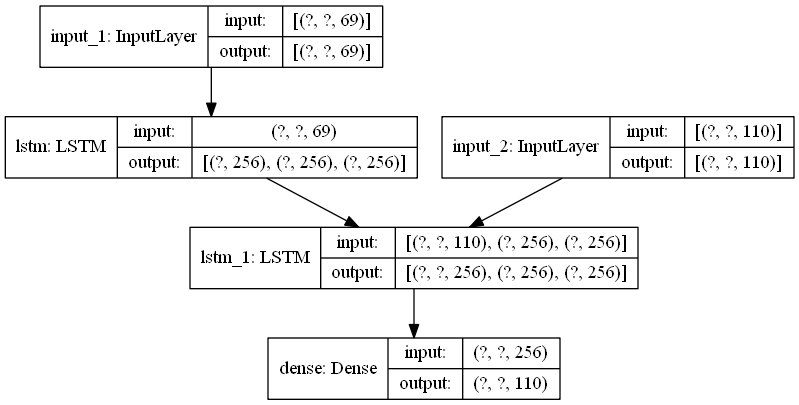

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, './img/translation/Seq2SeqForTranslation.png', show_shapes=True)

In [25]:
# Run training
# 训练
# encoder_input_data：输入要翻译的语句
# decoder_input_data：输入解码器的结果\t开头
# decoder_target_data：真正的翻译结果
model.compile(K.optimizers.RMSprop(),
              loss=[K.losses.categorical_crossentropy],
              metrics=[K.metrics.categorical_crossentropy])

In [26]:
import tensorflow.keras as k

In [27]:
import os
import datetime

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=optimizer,loss=MSPE(name = "MSPE"))

stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join('data', 'autograph', stamp)

## 在 Python3 下建议使用 pathlib 修正各操作系统的路径
# from pathlib import Path
# stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# logdir = str(Path('./data/autograph/' + stamp))

tb_callback =k.callbacks.TensorBoard(logdir, histogram_freq=1)
#如果loss在100个epoch后没有提升，学习率减半。
lr_callback =k.callbacks.ReduceLROnPlateau(monitor="loss",factor = 0.5, patience = 50)
#当loss在200个epoch后没有提升，则提前终止训练。
stop_callback =k.callbacks.EarlyStopping(monitor = "loss", patience= 100)

# 在每个训练期之后保存模型
save_dir = os.path.join(os.getcwd(), 'saved_models')
filepath="model_{epoch:02d}-{val_acc:.2f}.hdf5"
# mc_callback=
# tf.keras.callbacks.ModelCheckpoint(os.path.join(save_dir, filepath)
#                                    , monitor='val_loss',
#                                    verbose=0, save_best_only=False,
#                                    save_weights_only=False,
#                                    mode='auto', period=1)
mc_callback=k.callbacks.ModelCheckpoint(filepath='/tmp/weights.hdf5',
                            monitor='val_loss',
                            verbose=1, save_best_only=True)
# 把训练轮结果数据流到 csv 文件的回调函数。
csv_callback=k.callbacks.CSVLogger('training.log')

callbacks_list = [tb_callback,lr_callback,stop_callback,mc_callback,csv_callback]

In [ ]:
# model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
#           batch_size=batch_size,
#           epochs=epochs,
#           validation_split=0.2)
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,callbacks = callbacks_list)

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [30]:
# import pandas as pd 
# dfhistory = pd.DataFrame(history.history)
# dfhistory.index = range(1,len(dfhistory) + 1)
# dfhistory.index.name = 'epoch'

# dfhistory

In [ ]:
# Save model
model.save_weights('s2s.h5')

# 解码器

In [32]:
# # Next: inference mode (sampling). 下一步，推理模式（抽样），识别
# # Here's the drill:
# # 1) encode input and retrieve initial decoder state
# # 2) run one step of decoder with this initial state
# # and a "start of sequence" token as target.
# # Output will be the next target token
# # 3) Repeat with the current target token and current states
 
# # Define sampling models
# # 编码模型,encoder_states
# encoder_model = K.Model(encoder_inputs, encoder_states + encoder_states2)
 
# # 解码模型
# # 状态输入
# decoder_state_input_h = K.Input(shape=(latent_dim,))
# decoder_state_input_c = K.Input(shape=(latent_dim,))
# decoder_state_input_h2 = K.Input(shape=(latent_dim,))
# decoder_state_input_c2 = K.Input(shape=(latent_dim,))
# decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
# decoder_states_inputs2 = [decoder_state_input_h2, decoder_state_input_c2]
# # 训练后的LSTM,
# decoder_outputs, state_h, state_c = decoder_lstm(
#     decoder_inputs, initial_state=decoder_states_inputs)
# decoder_states = [state_h, state_c]
# decoder_outputs2, state_h2, state_c2 = decoder_lstm2(
#     decoder_outputs, initial_state=decoder_states_inputs2)
# decoder_states2 = [state_h2, state_c2]
# decoder_outputs = decoder_dense(decoder_outputs2)
# # 输入[decoder_inputs, decoder_state_input_h, decoder_state_input_c]
# # 输出[decoder_outputs, state_h, state_c]
# decoder_model = K.Model(
#     [decoder_inputs] + decoder_states_inputs + decoder_states_inputs2,
#     [decoder_outputs] + decoder_states + decoder_states2)
 
 
# def decode_sequence(input_seq):
#     # Encode the input as state vectors.
#     # 编码，抽象概念
#     states_value = encoder_model.predict(input_seq)
 
#     # Generate empty target sequence of length 1.
#     target_seq = np.zeros((1, 1, num_decoder_tokens))
#     # Populate the first character of target sequence with the start character.
#     target_seq[0, 0, char_to_int['\t']] = 1.
 
#     # Sampling loop for a batch of sequences
#     # (to simplify, here we assume a batch of size 1).
#     stop_condition = False
#     decoded_sentence = ''
#     while not stop_condition:
#         output_tokens, h, c, h2, c2 = decoder_model.predict(
#             [target_seq] + states_value)
 
#         # 对应字符下标，把预测出的字符拼成字符串
#         # Sample a token
#         sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         sampled_char = int_to_char[sampled_token_index]
#         decoded_sentence += sampled_char
 
#         # 句子结束
#         # Exit condition: either hit max length
#         # or find stop character.
#         if (sampled_char == '\n' or
#                 len(decoded_sentence) > max_encoder_seq_length):
#             stop_condition = True
 
#         # Update the target sequence (of length 1).
#         # 当前字符，传递到下一次预测
#         target_seq = np.zeros((1, 1, num_decoder_tokens))
#         target_seq[0, 0, sampled_token_index] = 1.
 
#         # Update states
#         # 当前状态，传递到下一次预测
#         states_value = [h, c, h2, c2]
 
#     return decoded_sentence


In [38]:
# Define sampling models
# 第一个黑盒，编码器，给定encoder_inputs，得到encoder的状态
encoder_model = Model(encoder_inputs, encoder_states)
# 第二个黑盒，解码器
# 解码器接受三个输入，两个是初始状态，一个是之前已经生成的文本
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
# 解码器产生三个输出，两个当前状态，一个是每个时刻的输出，其中最后一个时刻的输出可以用来计算下一个字
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [41]:
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

In [42]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    # 先把上句输入编码器得到编码的中间向量，这个中间向量将是解码器的初始状态向量
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    # 初始的解码器输入是开始符'\t'
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    
    # 迭代解码
    while not stop_condition:
        # 把当前的解码器输入和当前的解码器状态向量送进解码器
        # 得到对下一个时刻的预测和新的解码器状态向量
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        # 采样出概率最大的那个字作为下一个时刻的输入
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        # 如果采样到了结束符或者生成的句子长度超过了decoder_len，就停止生成
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        # 否则我们更新下一个时刻的解码器输入和解码器状态向量
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [43]:
# 得到结果

In [46]:
for seq_index in range(1):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: Go.
Decoded sentence: Του αρέσουν.

